In [1]:
import numpy as np
import h5py
from scipy.ndimage import gaussian_filter1d as gauss_conv
from numba.decorators import jit
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

%matplotlib inline

In [2]:
cd ~/dev/cloudacademyMap/gas_opac/

/Users/lia/dev/cloudacademyMap/gas_opac


In [3]:
import astropy.units as u

In [4]:
import opacity_demo as demo

In [5]:
# Specify which molecules you want to extract from the database (full list available in the readme)
chemical_species = np.array(['H2O', 'CH4', 'NH3', 'HCN', 'CO', 'CO2'])

# At what temperature and pressure do you desire the cross sections?
P = 1.0e-3    # Pressure (bar)
T = 1000.0    # Temperature (K)        

# Specify wavelength grid to extract cross section onto
wl_min = 0.4  # Minimum wavelength of grid (micron)
wl_max = 5.0  # Maximum wavelength of grid (micron)
N_wl = 1000   # Number of wavelength points

wl = np.linspace(wl_min, wl_max, N_wl)  # Uniform grid used here for demonstration purposes   

# Either sample the nearest wavelength points from the high resolution (R~10^6) cross section database or use an averaging prescription 
opacity_treatment = 'Log-avg'           # Options: Opacity-sample / Log-avg
#opacity_treatment = 'Opacity-sample'   # Opacity sampling is faster, but for low-resolution wavelength grids log averaging is recommended
  
# Extract desired cross sections from the database
cross_sections = demo.Extract_opacity(chemical_species, P, T, wl, opacity_treatment)   # Format: np array(N_species, N_wl) / Units: (m^2 / species)

Reading opacity database file
H2O done
CH4 done
NH3 done
HCN done
CO done
CO2 done


In [6]:
# Example: seperate H2O cross section, and print to terminal
H2O_cross_section = cross_sections['H2O']    # Format: np array(N_wl) / Units: (m^2 / molecule)
#print (H2O_cross_section)

In [7]:
# Copy/paste plot function from opacity_demo.py because I'm getting some weird errors

def plot_opacity(chemical_species, sigma_stored, P, T, wl_grid, **kwargs):

    # Max number of species this can plot is 9 (clustered beyond that!)                                                                                                  

    # Optional smoothing of cross sections (can improve clarity)                                                                                                         
    smooth = False
    smooth_factor = 5

    # Specify cross sections to plot, along with colours for each                                                                                                        
    #colours_plot = np.array(['royalblue', 'purple', 'crimson', 'orange', 'black', 'grey', 'green', 'magenta', 'chocolate'])                                             

    # Initialise plot                                                                                                                                                    
    #ax = plt.gca()
    #ax.set_xscale("log")                                                                                                                                                

    ax = plt.subplot(111)
    #xmajorLocator   = MultipleLocator(1.0)
    #xmajorFormatter = FormatStrFormatter('%.1f')
    #xminorLocator   = MultipleLocator(0.2)

    #ax.xaxis.set_major_locator(xmajorLocator)
    #ax.xaxis.set_major_formatter(xmajorFormatter)
    #ax.xaxis.set_minor_locator(xminorLocator)

    # Plot each cross section                                                                                                                                            
    for species in chemical_species:
        #species_idx = np.where(chemical_species == species)[0][0]
        sigma_plt = sigma_stored[species]*1.0e4   # Cross section of species q at given (P,T) pair (cm^2)                                                          

        if (smooth == True):
            sigma_plt = gauss_conv(sigma_plt, sigma=smooth_factor, mode='nearest')

        # Plot cross section                                                                                                                                             
        plt.semilogy(wl_grid, sigma_plt, label = species, **kwargs)

    plt.ylim([1.0e-28, 2.0e-18])
    plt.xlim([min(wl_grid), max(wl_grid)])
    plt.ylabel(r'$\mathrm{Cross \, \, Section \, \, (cm^{2})}$', fontsize = 15)
    plt.xlabel(r'$\mathrm{Wavelength} \; \mathrm{(\mu m)}$', fontsize = 15)

    ax.text(min(wl_grid)*1.05, 6.0e-19, (r'$\mathrm{T = }$' + str(T) + r'$\mathrm{K \, \, P = }$' + str(P*1000) + r'$\mathrm{mbar}$'), fontsize = 14)

    legend = plt.legend(loc='upper right', frameon=False, prop={'size':6}, ncol=2)

    '''for legline in legend.legendHandles:
        legline.set_linewidth(1.0)'''
    return

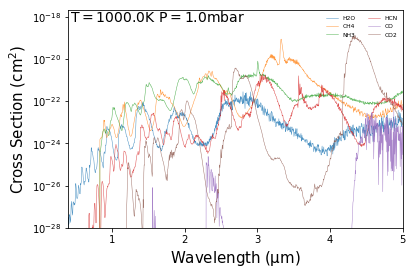

In [8]:
# Plot cross sections
plot_opacity(chemical_species, cross_sections, P, T, wl, lw=0.5, alpha=0.8)

## Grab all the opacities possible

Based on gases present both in Ryan's library and in the static weather output.

In [9]:
# Grabbed from Readme.txt
RMcD_gas = np.array(['H3+', 'Na', 'K', 'Li', 'Rb', 'Cs', 'H2', 'H2O', 'CH4', 'NH3', 'HCN', 'CO', \
                     'CO2', 'C2H2', 'H2S', 'N2', 'O2', 'O3', 'OH', 'NO', 'SO2', 'PH3', 'TiO', 'VO', \
                     'ALO', 'SiO', 'CaO', 'TiH', 'CrH', 'FeH', 'ScH', 'AlH', 'SiH', 'BeH', 'CaH', \
                     'MgH', 'LiH', 'SiH', 'CH', 'SH', 'NH'])

RMcD_gas_upper = np.array([g.upper() for g in RMcD_gas])

In [10]:
np.array(RMcD_gas_upper) == 'TIO'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [11]:
cd ..

/Users/lia/dev/cloudacademyMap


In [12]:
from maplib import load_out3

In [13]:
cd ~/Dropbox/Science/cloud-academy/Les_Houches_Cloud_Activity/

/Users/lia/Dropbox/Science/cloud-academy/Les_Houches_Cloud_Activity


In [14]:
# An example file to work from. I hope all of the reported columns are the same
PHI, THETA = -180, 0

# Get gas information
thermo = load_out3('thermo', PHI, THETA)

# Get wavelengths for later
wavel = load_out3('wavel', PHI, THETA)

In [15]:
thermo_gas = []
for k in thermo.keys():
    x = k.split('n_')
    if len(x) == 2:
        thermo_gas.append(x[1])
print(thermo_gas)

['H', 'Na', 'Mg', 'Fe', 'Ca', 'Al', 'Ti', 'C', 'TIO', 'TIO2', 'TIS', 'SIO', 'SIS', 'SIH', 'H2O', 'H2', 'H2S', 'MGH', 'MGOH', 'MG(OH)2', 'FEO', 'FES', 'FEH', 'FE(OH)2', 'ALOH', 'ALH', 'AL2O', 'ALO2H', 'CAO', 'CA(OH)2', 'CAS', 'CAOH', 'CAH', 'C2', 'C3', 'C2H', 'C2H2', 'CH4']


In [16]:
# Gases in static_weather model that are also in Ryan's opacity library
gases, gases_missing = [], []
for g in thermo_gas:
    if g in RMcD_gas_upper:
        ig = np.where(RMcD_gas_upper == g)[0]
        gases.append(RMcD_gas[ig][0])
    else:
        gases_missing.append(g)

In [17]:
print("Gases in both static_weather and Ryan's opacity library: ({} total)".format(len(gases)))
print(gases)
print("\nGases missing opacities: ({} total)".format(len(gases_missing)))
print(gases_missing)

Gases in both static_weather and Ryan's opacity library: (13 total)
['TiO', 'SiO', 'SiH', 'H2O', 'H2', 'H2S', 'MgH', 'FeH', 'AlH', 'CaO', 'CaH', 'C2H2', 'CH4']

Gases missing opacities: (25 total)
['H', 'Na', 'Mg', 'Fe', 'Ca', 'Al', 'Ti', 'C', 'TIO2', 'TIS', 'SIS', 'MGOH', 'MG(OH)2', 'FEO', 'FES', 'FE(OH)2', 'ALOH', 'AL2O', 'ALO2H', 'CA(OH)2', 'CAS', 'CAOH', 'C2', 'C3', 'C2H']


In [18]:
cd ~/dev/cloudacademyMap/gas_opac

/Users/lia/dev/cloudacademyMap/gas_opac


**Takes a few minutes to read in**

In [19]:
%%time
sw_xsects = demo.Extract_opacity(np.array(gases), P, T, wavel, opacity_treatment)

Reading opacity database file
TiO done
SiO done
SiH done
H2O done
H2 done
H2S done
MgH done
FeH done
AlH done
CaO done
CaH done
C2H2 done
CH4 done
CPU times: user 2min, sys: 54.3 s, total: 2min 54s
Wall time: 3min 17s


(0.2, 330)

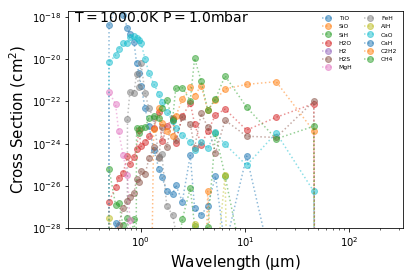

In [20]:
plot_opacity(np.array(gases), sw_xsects, P, T, wavel, marker='o', ls=':', alpha=0.5)
plt.semilogx()
plt.xlim(0.2, 330)

In [21]:
len(thermo['p'])

304

## To do next

[x] Load opacities for each (p, T) value

[x] Calculate dtau_dz for each element and vertical profile.

[x] Save the dtau_dz profiles to a file.

[ ] Write a function for reading in file.

[ ] Write a function for summing the gas contributions to dtau/dz.

[ ] Add those dtau_dz values to the atmosphere depth calculation.

## Look at densities as a function of temperature

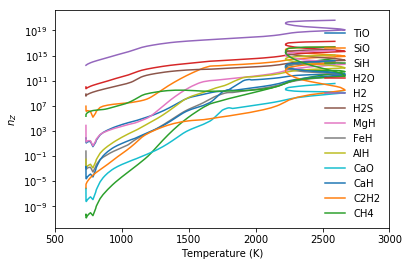

In [22]:
for g in gases:
    plt.plot(thermo['T'], thermo['n_' + g.upper()], label=g)
plt.semilogy()
plt.xlim(500, 3000)
plt.xlabel('Temperature (K)')
plt.ylabel('$n_Z$')
plt.legend(loc='lower right', frameon=False)

In [23]:
# Sanity check for pressure, temperature interpolation
# Suggested by Ryan
#T0 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500]
#T1 = np.arange(100, 3000, 50)

In [24]:
%%time
opacity_treatment = 'Log-avg'
test = demo.Extract_opacity_PTpairs(np.array(gases), thermo['p'], thermo['T'], wavel, opacity_treatment)

Reading opacity database file
TiO done
SiO done
SiH done
H2O done
H2 done
H2S done
MgH done
FeH done
AlH done
CaO done
CaH done
C2H2 done
CH4 done
CPU times: user 6min 11s, sys: 51 s, total: 7min 2s
Wall time: 7min 19s


In [25]:
test['TiO'][0]

array([0.00000000e+00, 0.00000000e+00, 2.14347212e-22, 4.47281423e-22,
       1.29905700e-21, 3.53249151e-22, 1.04683496e-22, 2.52623100e-23,
       8.56768717e-24, 1.58196485e-24, 9.39862143e-26, 3.68280847e-26,
       2.96488882e-27, 5.33163439e-28, 3.14810018e-29, 3.65333659e-30,
       3.32698108e-30, 1.56147535e-30, 2.14301779e-31, 1.40997078e-29,
       6.98666068e-31, 2.51045302e-27, 2.40541312e-30, 2.66165606e-31,
       5.96403292e-30, 4.35892019e-29, 7.09350429e-33, 8.54948670e-28,
       1.86176468e-34, 1.76090418e-32, 0.00000000e+00])

In [26]:
def calc_dtau_dz(gas, opac_dict):
    n_z = thermo['n_' + gas.upper()]
    sigma = opac_dict[gas]
    
    NP  = len(n_z) # number of vertical data points
    NWL = len(sigma[0,:]) # number of wavelengths
    
    result = np.zeros(shape=(NP, NWL))
    for i in range(NP):
        result[i,:] = n_z[i] * sigma[i,:] # cm^-1
    return result

In [27]:
dtau_dz = dict()
for g in gases:
    dtau_dz[g] = calc_dtau_dz(g, test)

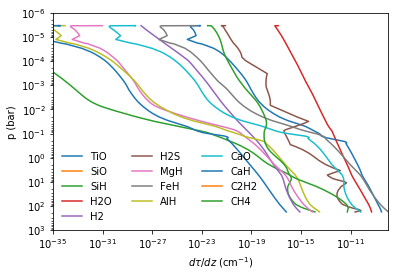

In [30]:
iw = 10
p = thermo['p'] * u.dyne / u.cm**2
for g in gases:
    plt.plot(dtau_dz[g][:,iw], p.to(u.bar), label=g)
plt.loglog()
plt.ylim(1.e3, 1.e-6)
plt.xlim(1.e-35, 1.e-8)
plt.xlabel(r'$d\tau/dz$ (cm$^{-1}$)')
plt.ylabel('p (bar)')
plt.legend(loc='lower left', frameon=False, ncol=3)

## Make a 3D array and save it

I'm going to use a FITS file for now. Seems like the simplest thing??

In [31]:
from astropy.io import fits

In [38]:
def write_opac_fits(opac_dict, filename):
    hdr = fits.Header()
    hdr['COMMENT'] = "dtau/dz for gas phase elements of HATP-7b"
    hdr['COMMENT'] = "Made from opacity tables of R. MacDonald"
    hdr['COMMENT'] = "See out3_*.dat files for p, T, and z profiles"
    
    primary_hdu = fits.PrimaryHDU(header=hdr)
    hdus_to_write = [primary_hdu]
    for k in opac_dict.keys():
        hdus_to_write.append(fits.ImageHDU(opac_dict[k], name=k))
    
    hdu_list = fits.HDUList(hdus=hdus_to_write)
    hdu_list.writeto(filename, overwrite=True)
    return

In [39]:
write_opac_fits(test, 'test.fits')

In [40]:
tt = fits.open('test.fits')

In [41]:
tt.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  TIO           1 ImageHDU         8   (31, 304)   float64   
  2  SIO           1 ImageHDU         8   (31, 304)   float64   
  3  SIH           1 ImageHDU         8   (31, 304)   float64   
  4  H2O           1 ImageHDU         8   (31, 304)   float64   
  5  H2            1 ImageHDU         8   (31, 304)   float64   
  6  H2S           1 ImageHDU         8   (31, 304)   float64   
  7  MGH           1 ImageHDU         8   (31, 304)   float64   
  8  FEH           1 ImageHDU         8   (31, 304)   float64   
  9  ALH           1 ImageHDU         8   (31, 304)   float64   
 10  CAO           1 ImageHDU         8   (31, 304)   float64   
 11  CAH           1 ImageHDU         8   (31, 304)   float64   
 12  C2H2          1 ImageHDU         8   (31, 304)   float64   
 13  CH4           1 ImageHDU         8   (31, 304)   float64   
